<a href="https://colab.research.google.com/github/SasiwimonV/bsc_dpdm22/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# อ่านข้อมูลจากไฟล์ Excel
df = pd.read_excel('/content/drive/MyDrive/ข้อมูลกรมอุตุ/ปริมาณน้ำฝน/ปริมาณฝนขอนแก่น.xlsx', index_col='ที่', parse_dates=True)
df.head()

,สถานี,เดือน/ปี,วันที่ 1,วันที่ 2,วันที่ 3,วันที่ 4,วันที่ 5,วันที่ 6,วันที่ 7,วันที่ 8,...,วันที่ 23,วันที่ 24,วันที่ 25,วันที่ 26,วันที่ 27,วันที่ 28,วันที่ 29,วันที่ 30,วันที่ 31,รวม
ที่,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,381201-ขอนแก่น จ.ขอนแก่น,2017-01-01,-,-,-,0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.2
2,381201-ขอนแก่น จ.ขอนแก่น,2017-02-01,-,0.2,-,-,-,-,-,-,...,-,2.2,2.2,-,-,-,-,-,-,4.6
3,381201-ขอนแก่น จ.ขอนแก่น,2017-03-01,-,-,-,-,-,-,0,3.9,...,-,2.4,0,26.9,-,-,-,0.9,3.3,44.4
4,381201-ขอนแก่น จ.ขอนแก่น,2017-04-01,-,-,-,-,-,-,-,-,...,1.5,10.1,1.8,-,-,0.2,-,-,-,37


In [92]:
df = df.fillna(method='ffill').dropna()
df.head()

,สถานี,เดือน/ปี,วันที่ 1,วันที่ 2,วันที่ 3,วันที่ 4,วันที่ 5,วันที่ 6,วันที่ 7,วันที่ 8,...,วันที่ 23,วันที่ 24,วันที่ 25,วันที่ 26,วันที่ 27,วันที่ 28,วันที่ 29,วันที่ 30,วันที่ 31,รวม
ที่,,,,,,,,,,,,,,,,,,,,,
1,381201-ขอนแก่น จ.ขอนแก่น,2017-01-01,-,-,-,0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.2
2,381201-ขอนแก่น จ.ขอนแก่น,2017-02-01,-,0.2,-,-,-,-,-,-,...,-,2.2,2.2,-,-,-,-,-,-,4.6
3,381201-ขอนแก่น จ.ขอนแก่น,2017-03-01,-,-,-,-,-,-,0,3.9,...,-,2.4,0,26.9,-,-,-,0.9,3.3,44.4
4,381201-ขอนแก่น จ.ขอนแก่น,2017-04-01,-,-,-,-,-,-,-,-,...,1.5,10.1,1.8,-,-,0.2,-,-,-,37
5,381201-ขอนแก่น จ.ขอนแก่น,2017-05-01,-,-,-,27.7,-,3.3,-,3.5,...,5,0.4,13.2,-,-,0,-,2.6,-,188


In [93]:
df.replace('-', 0, inplace=True)
df.head()

,สถานี,เดือน/ปี,วันที่ 1,วันที่ 2,วันที่ 3,วันที่ 4,วันที่ 5,วันที่ 6,วันที่ 7,วันที่ 8,...,วันที่ 23,วันที่ 24,วันที่ 25,วันที่ 26,วันที่ 27,วันที่ 28,วันที่ 29,วันที่ 30,วันที่ 31,รวม
ที่,,,,,,,,,,,,,,,,,,,,,
1,381201-ขอนแก่น จ.ขอนแก่น,2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
2,381201-ขอนแก่น จ.ขอนแก่น,2017-02-01,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.2,2.2,0.0,0.0,0.0,0.0,0.0,0.0,4.6
3,381201-ขอนแก่น จ.ขอนแก่น,2017-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9,...,0.0,2.4,0.0,26.9,0.0,0.0,0.0,0.9,3.3,44.4
4,381201-ขอนแก่น จ.ขอนแก่น,2017-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,10.1,1.8,0.0,0.0,0.2,0.0,0.0,0.0,37.0
5,381201-ขอนแก่น จ.ขอนแก่น,2017-05-01,0.0,0.0,0.0,27.7,0.0,3.3,0.0,3.5,...,5.0,0.4,13.2,0.0,0.0,0.0,0.0,2.6,0.0,188.0


In [94]:
column_names = df.columns
print(column_names)

Index(['สถานี', 'เดือน/ปี', 'วันที่ 1', 'วันที่ 2', 'วันที่ 3', 'วันที่ 4',
       'วันที่ 5', 'วันที่ 6', 'วันที่ 7', 'วันที่ 8', 'วันที่ 9', 'วันที่ 10',
       'วันที่ 11', 'วันที่ 12', 'วันที่ 13', 'วันที่ 14', 'วันที่ 15',
       'วันที่ 16', 'วันที่ 17', 'วันที่ 18', 'วันที่ 19', 'วันที่ 20',
       'วันที่ 21', 'วันที่ 22', 'วันที่ 23', 'วันที่ 24', 'วันที่ 25',
       'วันที่ 26', 'วันที่ 27', 'วันที่ 28', 'วันที่ 29', 'วันที่ 30',
       'วันที่ 31', 'รวม'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-p

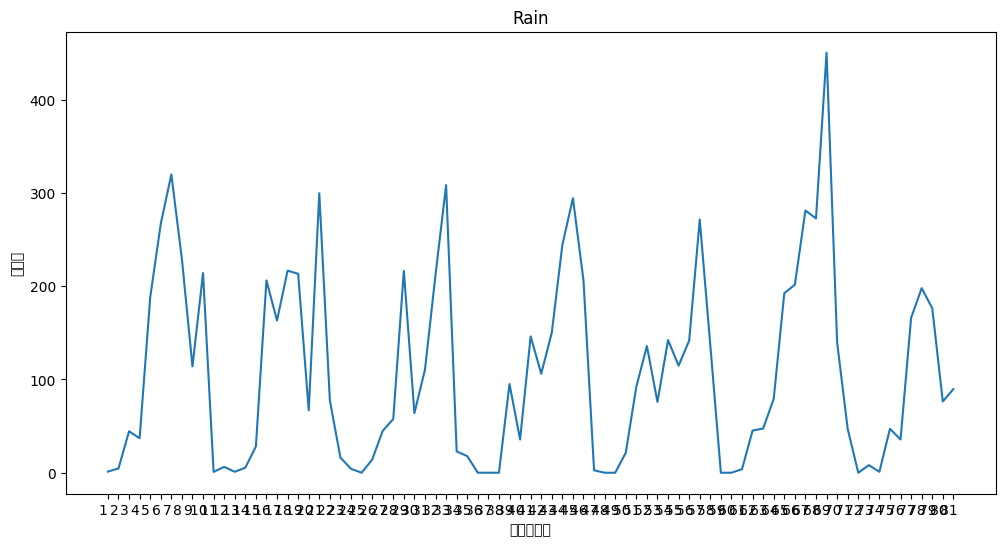

In [95]:
plt.figure(figsize=(12, 6))  # กำหนดขนาดของกราฟ
plt.plot(df.index, df['รวม'])  # แทน 'คอลัมน์ที่ต้องการพลอต' ด้วยชื่อคอลัมน์ของคุณ
plt.title('Rain')  # กำหนดชื่อกราฟ
plt.xlabel('สถานี')  # กำหนดชื่อแกน x
plt.ylabel('รวม')  # กำหนดชื่อแกน y
plt.show()  # แสดงกราฟ

#การทดสอบ Stationary

In [101]:
# ทดสอบค่าคงที่ด้วย ADF Test
result = adfuller(df['รวม'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

if result[1] <= 0.05:
    print('Stationary')
else:
    print('Non-Stationary')

ADF Statistic: -7.164791995107089
p-value: 2.905235481086708e-10
Critical Values:
1%: -3.528889992207215
5%: -2.9044395987933362
10%: -2.589655654274312
Stationary


In [110]:
df['รวม'] = df['รวม'] - df['รวม'].shift(1)
df = df.dropna()  # ลบข้อมูลที่ไม่มีค่าหลังจากการแปรผัน

if result[1] <= 0.05:
    print('Stationary')
else:
    print('Non-Stationary')

Stationary


<ipython-input-107-935d5b6f52f8>:14: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-935d5b6f52f8>:14: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  plt.tight_layout()
<ipython-input-107-935d5b6f52f8>:14: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-935d5b6f52f8>:14: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-935d5b6f52f8>:14: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-107-935d5b6f52f8>:14: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  plt.tight_layout()
<ipython-input-107-935d5b6f52f8>:14: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  plt.tight_layout()
<ipython-input-107-935d5b6f52f8>:14: U

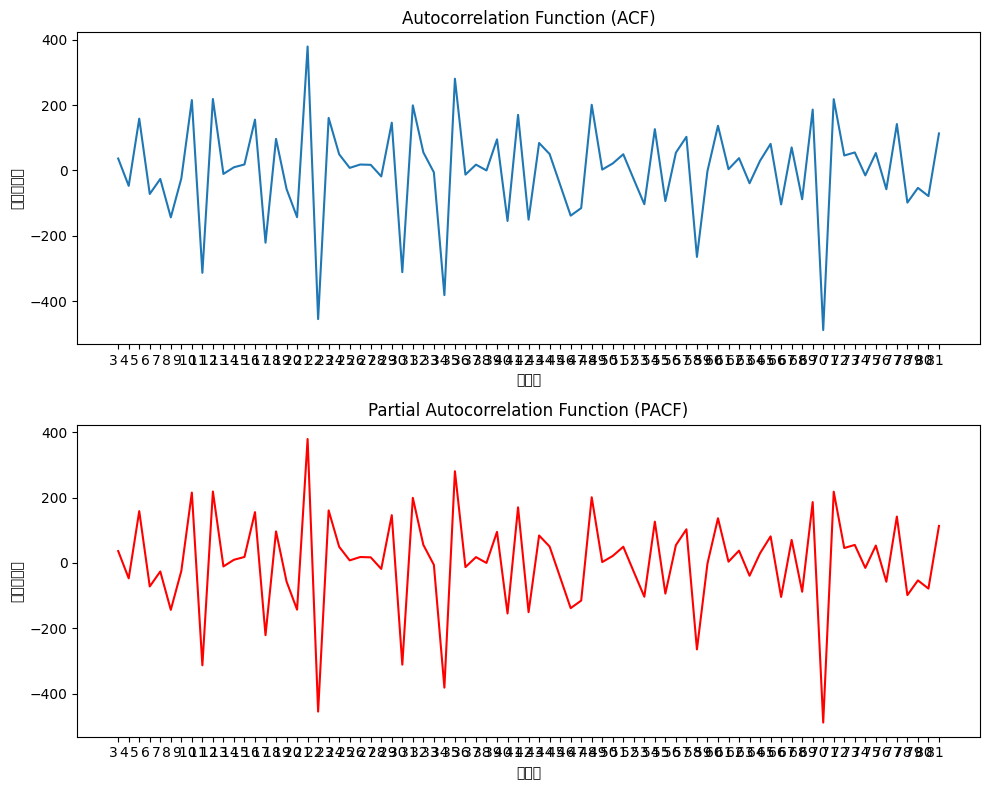

In [107]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(df.index, df['รวม'], label='รวม' )
axes[0].set_xlabel('รวม')
axes[0].set_ylabel('สถานี')
axes[0].set_title('Autocorrelation Function (ACF)')

axes[1].plot(df.index, df['รวม'], label='รวม', color='red' )
axes[1].set_xlabel('รวม')
axes[1].set_ylabel('สถานี')
axes[1].set_title('Partial Autocorrelation Function (PACF)')


plt.tight_layout()
plt.show()

In [ ]:
# สร้างแบบจำลอง ARIMA
model = ARIMA(df['รวม'], order=(p, d, q))
model_fit = model.fit()

# ทำนายข้อมูล
forecast = model_fit.forecast(steps=num_steps)  # ปรับค่า num_steps ตามความต้องการ

# แสดงผลลัพธ์ของการทำนาย
print(f'ผลลัพธ์การทำนาย: {forecast}')


In [ ]:
model = ARIMA(df['รวม'], order=(p, d, q))
model_fit = model.fit()